# Dollar-unit sampling and "taint"


## Dollar-unit sampling

Dollar-unit sampling (DUS) is a form of probability proportional to size (PPS) sampling that originated in statistical financial auditing.  In this case, "size" is an upper bound on the value of the item; DUS is sometimes called sampling with probability proportional to an upper bound (PPUB).

The idea is that each item in a population has a reported value and a true value; the true value is known only if the item is audited&mdash;which is expensive.  There is a possibility that the reported value is too high.  We sample units with probability proportional to their reported values.

Intuitively, it makes sense to focus attention on the items with larger reported values, because "that's where the money is." Errors in the values of those items potentially have a larger effect on the error in the total reported value for the population.

### The math

There are $N$ items, $\{x_j\}_{j=1}^N$. There are $N$ known numbers $\{u_j\}_{j=1}^N$ such that
\begin{equation*} 
   0 \le x_j \le u_j, \; j = 1, \ldots, N.
\end{equation*}
Define $u := \sum_{j=1}^N u_j$, $x := \sum_{j=1}^N x_j$, and $\mu := x/N = \frac{1}{N} \sum_{j=1}^N x_j$.

We will consider only sampling with replacement (although this can be extended to sampling without replacement).

In the $i$th draw, we select item $j$ with probability $\pi_j := u_j/u$.  

Suppose the $i$th draw selects item $J$.
Then $X_i = x_J$ and $U_i = u_J$.
If we sample with replacement, $\{X_i\}$ are iid, as are $\{U_i \}$.

## Taint

Define $t_j := x_j/u_j$. This value, the "taint," is the fraction of the reported value that the true value represents.

Define $t := x/u$. (This is _not_ parallel to the definitions of $x$ and $u$.)

Define $T_i := X_i/U_i$, the taint of the item selected in the $i$th draw. Then $\{T_i \}$ are iid.

Calculate:
\begin{equation*} 
    \mathbb E T_i = \sum_{j=1}^N t_j \pi_j = \sum_{j=1}^N (x_j/u_j) (u_j/u) = \frac{1}{u}\sum_{j=1}^N x_j = x/u = t.
\end{equation*}
Thus the expected value of the taint for any draw, times $u$, is the population total $x$.

Since $u$ is known, we can translate an upper confidence bound for $\mathbb E T_i$ into an upper confidence bound for $x$ or for $\mu$ by multiplication.

This is the relationship we will exploit to connect auditing problems to the problem of finding a nonparametric confidence bound for the mean of a non-negative or bounded population.

The main point is that since $\mathbb P \{T_i \in [0, 1]\} = 1$, we can use any of the methods we've developed for finding confidence bounds for the mean of nonnegative or bounded populations (Binomial with thresholding, Chebychev's inequality, Hoeffding's inequality, Markov's inequality, Anderson's method, the Kaplan-Markov method, or other supermartingale-based methods) to make confidence bonds for $\mathbb E T_i$.  
In turn, any confidence bound for $t$ can be translated easily into a rigorous confidence bound for the population mean $\mu$ and population total $x$.

## Some examples

### Litigation and elections

A plaintiff might want to find a confidence bound in one direction; a defendant might want a confidence bound in the opposite direction.

+ Employment litigation
  - wage and hour: overtime is nonnegative, and has an upper bound based on the number of days an employee worked
  - missed meal or rest breaks: nonnegative and has an upper bound based on days worked
+ Toxic tort class action
  - damages are nonnegative
+ Construction defects, product defects
  - damages nonnegative and bounded (e.g., by replacement cost)
+ Illegal charges for loan origination
  - nonnegative and bounded by total origination fee
+ Patent and intellectual property infringement
  - damages nonnegative; upper bound from royalty rate and number of potentially infringing items
+ Healthcare fraud
  - damages nonnegative and bounded by billed amount
+ Tax fraud
  - taxes paid is an upper bound
+ Under-refunding of security deposits
  - amount not refunded is an upper bound
+ Election integrity
  - upper and lower bounds on the error in counting the votes on a ballot depend on the election rules; I'll talk about this in my plenary lecture

Here's simple code to draw a weighted random sample in Python. For other approaches, see 
[the cryptorandom library](https://github.com/statlab/cryptorandom).

In [1]:
# This is the first cell with code: set up the Python environment
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
import scipy.stats
from scipy.stats import binom
import pandas as pd
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML

In [2]:
def weightedRandomSample(n, weights):
    '''
       Weighted random sample of size n drawn with replacement.
       Returns indices of the selected items and the raw uniform values used to 
       select them.
    '''
    if any(weights < 0):
        print('negative weight in weightedRandomSample')
        return float('NaN')
    else:
        wc = np.cumsum(weights, dtype=float)/np.sum(weights, dtype=float)  # ensure weights sum to 1
        theSam = np.random.random_sample((n,))
        return np.array(wc).searchsorted(theSam), theSam

[1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5
 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


(array([ 4.,  7., 14.,  8., 13., 13., 12., 15.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <BarContainer object of 8 artists>)

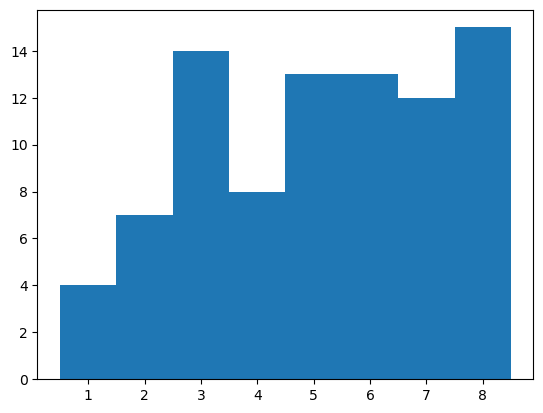

In [3]:
# illustrate the random sampling code
vals = 10
n = 100
w = np.arange(vals)+1  # linearly increasing weights
wrs, raw = weightedRandomSample(n, w)
print(np.sort(wrs))
fig, ax = plt.subplots(nrows=1, ncols=1)
bins = np.arange(np.min(wrs)-0.5, np.max(wrs)+0.5, 1)
ax.hist(wrs, bins=bins)